In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
male = pd.read_csv("/content/drive/My Drive/Datasets/Indian-Male-Names.csv")
female = pd.read_csv("/content/drive/My Drive/Datasets/Indian-Female-Names.csv")

In [3]:
male.head()

,name,gender,race
0,barjraj,m,indian
1,ramdin verma,m,indian
2,sharat chandran,m,indian
3,birender mandal,m,indian
4,amit,m,indian


In [4]:
female.head()

,name,gender,race
0,shivani,f,indian
1,isha,f,indian
2,smt shyani devi,f,indian
3,divya,f,indian
4,mansi,f,indian


In [5]:
frames = [male,female]
df = pd.concat(frames,ignore_index=True)

In [6]:
df = df.sample(frac=1)
df.head()

,name,gender,race
5860,rajkiran,m,indian
22853,kiran gupta,f,indian
17302,salma,f,indian
26574,nitu rani,f,indian
17451,alisha khan,f,indian


In [17]:
df = (df.assign( firstname = lambda x : x.name.str.split(' ').str[0]))
df.drop(['race','isVowel','NameLen'],1).head()

,name,gender,firstname
5860,rajkiran,m,rajkiran
22853,kiran gupta,f,kiran
17302,salma,f,salma
26574,nitu rani,f,nitu
17451,alisha khan,f,alisha


In [8]:
df['firstname'] = df['firstname'].str.replace(r'[^\w\s]+', '')

In [9]:
vowels = ('a','e','i','o','u')

In [10]:
df.dropna(inplace=True)

In [15]:
df = df.assign(isVowel = lambda x: x.firstname.str.endswith(vowels).astype('int'))
df.drop('race',1).head()

,name,gender,firstname,isVowel,NameLen
5860,rajkiran,m,rajkiran,0,8
22853,kiran gupta,f,kiran,0,5
17302,salma,f,salma,1,5
26574,nitu rani,f,nitu,1,4
17451,alisha khan,f,alisha,1,6


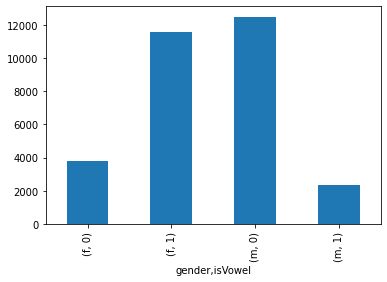

In [12]:
df.groupby(['gender','isVowel'])['name'].count().plot(kind = 'bar')

In [13]:
df['NameLen'] = df['firstname'].str.len()
df.drop(['isVowel','race'],1).head()

,name,gender,firstname,NameLen
5860,rajkiran,m,rajkiran,8
22853,kiran gupta,f,kiran,5
17302,salma,f,salma,5
26574,nitu rani,f,nitu,4
17451,alisha khan,f,alisha,6


In [14]:
df.groupby(['gender'])['NameLen'].mean()

gender
f    5.514429
m    5.791040
Name: NameLen, dtype: float64

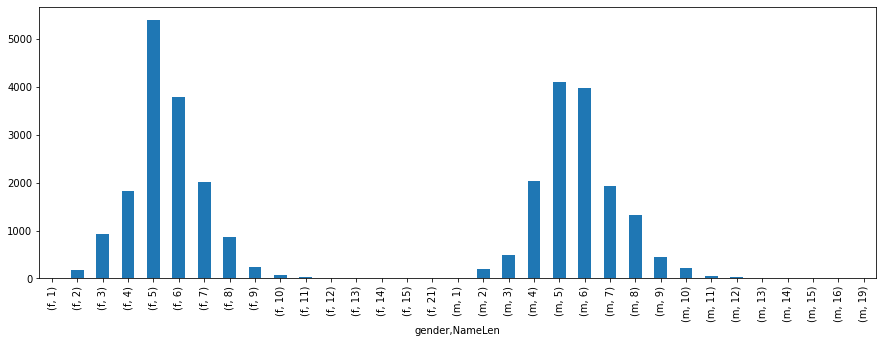

In [24]:
df.groupby(['gender','NameLen'])['name'].count().plot(kind = 'bar',figsize=(15,5))

In [ ]:
# To remove Hindi character names
df['firstname'] = df["firstname"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [ ]:
# To remove digits
df['firstname'] = df['firstname'].str.replace('\d+', '')

In [ ]:
# To remove white spaces
df.firstname = df.firstname.str.strip()

In [ ]:
df.head()

,name,gender,race,firstname,isVowel,NameLen
2166,md sahid,m,indian,md,0,2
1318,suraj kumar,m,indian,suraj,0,5
28862,luxmi,f,indian,luxmi,1,5
23408,bimlesh,f,indian,bimlesh,0,7
23358,mamta,f,indian,mamta,1,5


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(df.gender)
df.gender = le.transform(df.gender)

In [ ]:
le.classes_

array(['f', 'm'], dtype=object)

In [ ]:
df.head()

,name,gender,race,firstname,isVowel,NameLen
2166,md sahid,1,indian,md,0,2
1318,suraj kumar,1,indian,suraj,0,5
28862,luxmi,0,indian,luxmi,1,5
23408,bimlesh,0,indian,bimlesh,0,7
23358,mamta,0,indian,mamta,1,5


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
n=3
vect = CountVectorizer(analyzer=lambda x: (x[-i-1:] for i in range(0,min(n,len(x)))))

In [ ]:
vect.fit(df.firstname)

CountVectorizer(analyzer=<function <lambda> at 0x7fb80d8ead90>, binary=False,
                decode_error='strict', dtype=<class 'numpy.int64'>,
                encoding='utf-8', input='content', lowercase=True, max_df=1.0,
                max_features=None, min_df=1, ngram_range=(1, 1),
                preprocessor=None, stop_words=None, strip_accents=None,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None,
                vocabulary=None)

In [ ]:
mat = vect.transform(df.firstname).todense()

In [ ]:
mat

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
grams = pd.DataFrame(mat, columns=vect.get_feature_names())

In [ ]:
grams

,a,aa,aab,aad,aaj,aak,aal,aam,aan,aar,aas,aat,aaz,ab,aba,abh,abi,abu,aby,ace,ad,ada,ade,adh,adi,adu,aee,ael,aer,af,afa,afe,afi,ag,aga,age,agi,ah,aha,ahe,...,ye,yed,yi,yja,yji,yma,ymo,ymu,yna,yra,yta,yti,yu,yub,yum,yur,yus,z,za,zad,zaj,zal,zam,zan,zaz,zi,zia,zid,zim,zin,zir,zma,zni,zoo,zra,zu,zum,zur,zy,zya
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30169,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
30170,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
grams.shape

(30172, 1592)

In [ ]:
new_df = df.join(grams)

In [ ]:
new_df.head()

,name,gender,race,firstname,isVowel,NameLen,a,aa,aab,aad,aaj,aak,aal,aam,aan,aar,aas,aat,aaz,ab,aba,abh,abi,abu,aby,ace,ad,ada,ade,adh,adi,adu,aee,ael,aer,af,afa,afe,afi,ag,...,ye,yed,yi,yja,yji,yma,ymo,ymu,yna,yra,yta,yti,yu,yub,yum,yur,yus,z,za,zad,zaj,zal,zam,zan,zaz,zi,zia,zid,zim,zin,zir,zma,zni,zoo,zra,zu,zum,zur,zy,zya
11647,narbahadur,1,indian,narbahadur,0,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27985,premi devi,0,indian,premi,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20970,aanik with her son,0,indian,aanik,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1848,mohit,1,indian,mohit,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6364,ramfare yadav,1,indian,ramfare,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
new_df.dropna(inplace=True)

In [ ]:
new_df.shape

(30117, 1598)

In [ ]:
X = new_df.drop(['name','gender','race','firstname'],axis=1)
y = new_df['gender']

In [ ]:
X.head()

,isVowel,NameLen,a,aa,aab,aad,aaj,aak,aal,aam,aan,aar,aas,aat,aaz,ab,aba,abh,abi,abu,aby,ace,ad,ada,ade,adh,adi,adu,aee,ael,aer,af,afa,afe,afi,ag,aga,age,agi,ah,...,ye,yed,yi,yja,yji,yma,ymo,ymu,yna,yra,yta,yti,yu,yub,yum,yur,yus,z,za,zad,zaj,zal,zam,zan,zaz,zi,zia,zid,zim,zin,zir,zma,zni,zoo,zra,zu,zum,zur,zy,zya
11869,0,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29739,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16518,1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1089,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24543,0,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y.head()

5915     1
12711    1
9572     1
14597    1
6859     1
Name: gender, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
#svm_model = SVC()

In [ ]:
final_model = SVC(probability=True)

In [ ]:
print(X_train.shape,y_train.shape)

(24093, 1594) (24093,)


In [ ]:
final_model.fit(X,y)

In [ ]:
0#y_preds = svm_model.predict(X_test)

### **Confusion Matrix**







In [ ]:
from sklearn import metrics

In [ ]:
metrics.confusion_matrix(y_test, y_preds)

In [ ]:
cm_svm = metrics.confusion_matrix(y_test,y_preds)
cm_svm = pd.DataFrame(cm_svm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
per_list = []
per_list.append((cm_svm['Predicted Negative'][0]/(cm_svm['Predicted Negative'][0]+cm_svm['Predicted Negative'][1]))*100)
per_list.append((cm_svm['Predicted Positive'][1]/(cm_svm['Predicted Positive'][0]+cm_svm['Predicted Positive'][1]))*100)

cm_svm.insert(2,'Correct percentage',per_list)

cm_svm

The Correct Percentage of predictions is great!

In [ ]:
print(metrics.classification_report(y_test, y_preds))

**Creating the final model with whole data**

In [ ]:
final_model.fit(X,y)

**Saving the Label Encoder, n-gram model and final SVM model to pickles**



In [ ]:
import dill
import pickle

In [ ]:
le_pickle_file = "/content/drive/My Drive/GenderPredictionModels/le_pickle.pickle"
n_gram_pickle_file = "/content/drive/My Drive/GenderPredictionModels/n_gram_pickle.pickle"
final_svm_model_pickle_file = "/content/drive/My Drive/GenderPredictionModels/final_svm_model.pickle"

In [ ]:
pickle.dump(le, open(le_pickle_file, 'wb'))

pickle.dump(final_model, open(final_svm_model_pickle_file, 'wb'))

# **Importing Our data!**

In [ ]:
our_data = pd.read_csv("/content/drive/My Drive/Datasets/usernames3.csv")

In [ ]:
our_data.rename(columns={'NAME':'name'},inplace=True)

In [ ]:
our_data = our_data.assign(firstname = lambda x: x.first_name.str.split(' ').str[0])
our_data.head()

,user_id,first_name,name,firstname
0,425,komal,NaN,komal
1,495,Reena,NaN,Reena
2,556,Himabindu,Sudhir,Himabindu
3,624,Leela,NaN,Leela
4,729,Thara,NaN,Thara


In [ ]:
import numpy as np

In [ ]:
our_data = our_data.assign(new_name= lambda x: np.where(x.first_name.str.len() <= 3, 
                                            x.first_name + x.name, 
                                            x.first_name))

our_data.head()

,user_id,first_name,name,firstname,new_name
0,425,komal,NaN,komal,komal
1,495,Reena,NaN,Reena,Reena
2,556,Himabindu,Sudhir,Himabindu,Himabindu
3,624,Leela,NaN,Leela,Leela
4,729,Thara,NaN,Thara,Thara


In [ ]:
our_data.shape

(171, 5)

In [ ]:
our_data[our_data['user_id']==1678]

,user_id,first_name,name,firstname,new_name


In [ ]:
our_data.isna().sum()

user_id       0
first_name    0
name          9
firstname     0
new_name      1
dtype: int64

In [ ]:
our_data['new_name'] = our_data['new_name'].str.strip()

In [ ]:
our_data['new_name'] = our_data['new_name'].str.replace(r'[^\w\s]+', '')

In [ ]:
our_data.dropna(inplace=True)

In [ ]:
our_data = our_data.assign(isVowel = lambda x: x.new_name.str.endswith(vowels).astype('int'))
our_data.head()

,user_id,first_name,name,firstname,new_name,isVowel
2,556,Himabindu,Sudhir,Himabindu,Himabindu,1
10,19617,Preet,Param,Preet,Preet,0
11,19618,Gupta,Amit,Gupta,Gupta,1
12,19619,Resident,Hyd,Resident,Resident,0
13,19620,Agrawal,Udish,Agrawal,Agrawal,0


In [ ]:
our_data['NameLen'] = our_data['new_name'].str.len()
our_data.head()

,user_id,first_name,name,firstname,new_name,isVowel,NameLen
2,556,Himabindu,Sudhir,Himabindu,Himabindu,1,9
10,19617,Preet,Param,Preet,Preet,0,5
11,19618,Gupta,Amit,Gupta,Gupta,1,5
12,19619,Resident,Hyd,Resident,Resident,0,8
13,19620,Agrawal,Udish,Agrawal,Agrawal,0,7


In [ ]:
# To remove Hindi character names
our_data['new_name'] = our_data["new_name"].apply(lambda x: ''.join([" " if ord(i) < 32 or ord(i) > 126 else i for i in x]))

In [ ]:
# To remove digits
our_data['new_name'] = our_data['new_name'].str.replace('\d+', '')

In [ ]:
our_mat = vect.transform(our_data.new_name).todense()

In [ ]:
our_grams = pd.DataFrame(our_mat, columns=vect.get_feature_names())

In [ ]:
real_final = our_data.join(our_grams)

In [ ]:
real_final.head()

,user_id,first_name,name,firstname,new_name,isVowel,NameLen,a,aa,aab,aad,aaj,aak,aal,aam,aan,aar,aas,aat,aaz,ab,aba,abh,abi,abu,aby,ace,ad,ada,ade,adh,adi,adu,aee,ael,aer,af,afa,afe,afi,...,ye,yed,yi,yja,yji,yma,ymo,ymu,yna,yra,yta,yti,yu,yub,yum,yur,yus,z,za,zad,zaj,zal,zam,zan,zaz,zi,zia,zid,zim,zin,zir,zma,zni,zoo,zra,zu,zum,zur,zy,zya
2,556,Himabindu,Sudhir,Himabindu,Himabindu,1,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,19617,Preet,Param,Preet,Preet,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,19618,Gupta,Amit,Gupta,Gupta,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,19619,Resident,Hyd,Resident,Resident,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,19620,Agrawal,Udish,Agrawal,Agrawal,0,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
real_final[real_final['user_id']==1678]

,user_id,first_name,name,firstname,new_name,isVowel,NameLen,a,aa,aab,aad,aaj,aak,aal,aam,aan,aar,aas,aat,aaz,ab,aba,abh,abi,abu,aby,ace,ad,ada,ade,adh,adi,adu,aee,ael,aer,af,afa,afe,afi,...,ye,yed,yi,yja,yji,yma,ymo,ymu,yna,yra,yta,yti,yu,yub,yum,yur,yus,z,za,zad,zaj,zal,zam,zan,zaz,zi,zia,zid,zim,zin,zir,zma,zni,zoo,zra,zu,zum,zur,zy,zya


In [ ]:
real_X = real_final.drop(['user_id','first_name','firstname','name','new_name'],1)

In [ ]:
real_X.fillna(0,inplace=True)

In [ ]:
model = pickle.load(open(final_svm_model_pickle_file, 'rb'))

In [ ]:
our_preds = model.predict(real_X)

In [ ]:
submit = our_data[['user_id','firstname','name']]

In [ ]:
our_genders = le.inverse_transform(our_preds)

In [ ]:
submit['gender'] = our_genders

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submit

,user_id,firstname,name,gender
2,556,Himabindu,Sudhir,f
10,19617,Preet,Param,m
11,19618,Gupta,Amit,f
12,19619,Resident,Hyd,m
13,19620,Agrawal,Udish,m
...,...,...,...,...
166,19782,parmar,gaurav,m
167,19783,Deshpande,Amit,f
168,19784,A,Pranahitha,f
169,19785,Yettapu,Siva Lakshmi,f


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


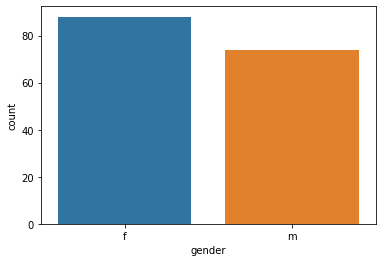

In [ ]:
sns.countplot(submit.gender)

In [ ]:
submit.head(50)

,user_id,firstname,name,gender
2,556,Himabindu,Sudhir,f
10,19617,Preet,Param,m
11,19618,Gupta,Amit,f
12,19619,Resident,Hyd,m
13,19620,Agrawal,Udish,m
14,19621,Singh,Vandana,m
15,19622,Gupta,shubham,f
16,19623,K,Muralidhar,m
17,19624,K,Srujana,f
18,19625,Lomte,Prashanth,f


In [ ]:
real_X

,isVowel,NameLen,a,aa,aab,aad,aaj,aak,aal,aam,aan,aar,aas,aat,aaz,ab,aba,abh,abi,abu,aby,ace,ad,ada,ade,adh,adi,adu,aee,ael,aer,af,afa,afe,afi,ag,aga,age,agi,ah,...,ye,yed,yi,yja,yji,yma,ymo,ymu,yna,yra,yta,yti,yu,yub,yum,yur,yus,z,za,zad,zaj,zal,zam,zan,zaz,zi,zia,zid,zim,zin,zir,zma,zni,zoo,zra,zu,zum,zur,zy,zya
2,1,9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,1,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0,7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,1,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,1,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
probs = model.predict_proba(real_X)

In [ ]:
submit[['probability_female','probability_male']] = probs

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [ ]:
submit.head()

,user_id,firstname,name,gender,probability_female,probability_male
2,556,Himabindu,Sudhir,f,0.833267,0.166733
10,19617,Preet,Param,m,0.228575,0.771425
11,19618,Gupta,Amit,f,0.834522,0.165478
12,19619,Resident,Hyd,m,0.225874,0.774126
13,19620,Agrawal,Udish,m,0.215097,0.784903


In [ ]:
submit.to_csv('/content/drive/My Drive/Output Gender/Gender_data_2.csv',index=False)